### MATALA 2 כרייה וניתוח נתונים מתקדם בפייתון

In [127]:
import pandas as pd

In [128]:
data = pd.read_csv('matala2_cosmetics_2019-Nov.csv')

c:\users\חן אופיר\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [129]:
df= data.iloc[:50001].append(data.iloc[780000:800000]).append(data.iloc[1780000:1800000]).append(data.iloc[2780000:2800000]).copy()
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:02 UTC,view,5802432,1487580009286598681,NaN,NaN,0.32,562076640,09fafd6c-6c99-46b1-834f-33527f4de241
1,2019-11-01 00:00:09 UTC,cart,5844397,1487580006317032337,NaN,NaN,2.38,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
2,2019-11-01 00:00:10 UTC,view,5837166,1783999064103190764,NaN,pnb,22.22,556138645,57ed222e-a54a-4907-9944-5a875c2d7f4f
3,2019-11-01 00:00:11 UTC,cart,5876812,1487580010100293687,NaN,jessnail,3.16,564506666,186c1951-8052-4b37-adce-dd9644b1d5f7
4,2019-11-01 00:00:24 UTC,remove_from_cart,5826182,1487580007483048900,NaN,NaN,3.33,553329724,2067216c-31b5-455d-a1cc-af0575a34ffb
...,...,...,...,...,...,...,...,...,...
2799995,2019-11-21 10:43:54 UTC,view,5889099,1487580005268456287,NaN,NaN,4.13,390204267,c8e44c0e-7b07-45b9-a4c0-39979aa13f04
2799996,2019-11-21 10:43:55 UTC,view,5823969,1487580005268456287,NaN,uno,16.24,520878855,48b893ff-5690-4018-9cd7-98e56b73bfc8
2799997,2019-11-21 10:43:55 UTC,view,5839313,1487580007256556476,NaN,lovely,2.52,327049799,437bc7e9-9ed4-4140-96b5-78a51747abdd
2799998,2019-11-21 10:43:55 UTC,cart,5809912,1602943681873052386,NaN,grattol,5.24,466012248,e9693fe5-1ad8-49f5-9328-694108c7a707


# Q1

In [130]:
#data.info()

In [131]:
import pandas as pd

df['event_time'] = pd.to_datetime(df['event_time']) # convert the 'event_time' column to a datetime type
df = df.sort_values(by=['user_session', 'event_time']) # sort the DataFrame by 'user_session' and 'event_time'

# calculate the duration to the next event within the same session
df['duration_to_next_event'] = df.groupby('user_session')['event_time'].shift(-1) - df['event_time']

# convert the duration to seconds
df['duration_to_next_event'] = df['duration_to_next_event'].dt.total_seconds()

# For the last event in each user session, set the duration_to_next_event to 0
last_event_mask = df.groupby('user_session')['event_time'].transform(max) == df['event_time']
df.loc[last_event_mask, 'duration_to_next_event'] = 0
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
2792529,2019-11-21 10:09:53+00:00,view,5694897,1487580009076883471,NaN,NaN,1.14,574355965,00042372-a7dd-40e6-8ad1-f408864d2901,0.0
2789913,2019-11-21 09:56:44+00:00,view,5770331,1487580007717929935,NaN,milv,0.63,562938528,0005d374-dd22-4056-82b1-9722cd480db3,46.0
2790047,2019-11-21 09:57:30+00:00,view,47610,1487580007717929935,NaN,NaN,0.73,562938528,0005d374-dd22-4056-82b1-9722cd480db3,0.0
1798803,2019-11-14 02:50:26+00:00,view,5881608,2151191071051219817,NaN,lovely,13.48,488388682,000686f8-7f7a-40e1-ae7d-bc4792245200,0.0
1468,2019-11-01 01:35:21+00:00,view,4765,1487580010796548183,NaN,runail,0.38,566291244,0006b6fd-2930-4652-a4de-3c10b6ba131a,0.0
...,...,...,...,...,...,...,...,...,...,...
787983,2019-11-06 23:09:35+00:00,cart,5862728,1487580008246412266,NaN,keune,21.0,568367758,NaN,NaN
787985,2019-11-06 23:09:37+00:00,cart,5862728,1487580008246412266,NaN,keune,21.0,568367758,NaN,NaN
1789249,2019-11-13 21:41:26+00:00,cart,5816539,1487580005553668971,NaN,NaN,7.46,571219466,NaN,NaN
1790391,2019-11-13 21:54:29+00:00,cart,5585658,1487580007256556476,NaN,NaN,0.71,524971455,NaN,NaN


# Q2 + Q3

In [136]:
# Sort the dataframe by user_id and event_time
df.sort_values(['user_id', 'event_time'], inplace=True)

# Calculate the time difference between each event and the next event in the same session
df['duration_to_next_event'] = df.groupby('user_session')['event_time'].diff().dt.total_seconds().fillna(0)

# Create a new column called panel that identifies a sequence of visits of the same user on the website that are not more than 5 days apart
df['panel'] = (df['event_time'].diff() > pd.Timedelta(days=5)).cumsum()

# Create a new column called funnel_number that identifies the panel number for each user_session
df['funnel_number'] = df.groupby('user_id')['panel'].transform(lambda x: pd.factorize(x)[0] + 1)

# Create a new column called index_in_funnel that identifies the index of each user_session within its funnel
df['index_in_funnel'] = df.groupby(['user_id', 'panel']).cumcount() + 1


In [142]:
df.head(20)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,panel_number,funnel_number,panel,index_in_funnel
44711,2019-11-01 11:16:58+00:00,view,5866215,1487580008246412266,NaN,NaN,8.79,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0.0,1,1,0,1
44881,2019-11-01 11:18:26+00:00,cart,5899429,1487580008263189483,NaN,NaN,6.75,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,88.0,1,1,0,2
44882,2019-11-01 11:18:28+00:00,cart,5899431,1487580008246412266,NaN,NaN,11.44,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,2.0,1,1,0,3
44908,2019-11-01 11:18:41+00:00,cart,5899426,1487580009143992338,NaN,NaN,12.73,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,13.0,1,1,0,4
44913,2019-11-01 11:18:43+00:00,cart,5899427,1783999067156644376,NaN,NaN,17.63,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,2.0,1,1,0,5
44956,2019-11-01 11:19:06+00:00,cart,5899428,1487580009143992338,NaN,NaN,10.32,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,23.0,1,1,0,6
45647,2019-11-01 11:25:14+00:00,view,5899429,1487580008263189483,NaN,NaN,6.75,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,368.0,1,1,0,7
1785994,2019-11-13 21:11:28+00:00,view,5802162,1487580013069861041,NaN,italwax,23.81,25635927,c7439e5c-c7cd-477f-9194-2189e6c8d19d,0.0,1,1,1,1
1786094,2019-11-13 21:12:25+00:00,cart,5802162,1487580013069861041,NaN,italwax,23.81,25635927,c7439e5c-c7cd-477f-9194-2189e6c8d19d,57.0,1,1,1,2
1786395,2019-11-13 21:15:11+00:00,view,5766980,1487580013053083824,stationery.cartrige,italwax,1.98,25635927,c7439e5c-c7cd-477f-9194-2189e6c8d19d,166.0,1,1,1,3


# Q4

In [143]:
import re

# Define a regular expression pattern to match the price value
price_pattern = r'(\d+\.\d+)'

# Apply the regular expression pattern to the price column
df['price'] = df['price'].str.extract(price_pattern, expand=False)

# Remove any remaining non-numeric characters from the price column
df['price'] = df['price'].str.replace(',', '')

# Convert the values in the price column to float
df['price'] = df['price'].astype(float)
df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,panel_number,funnel_number,panel,index_in_funnel
44711,2019-11-01 11:16:58+00:00,view,5866215,1487580008246412266,NaN,NaN,8.79,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,0.0,1,1,0,1
44881,2019-11-01 11:18:26+00:00,cart,5899429,1487580008263189483,NaN,NaN,6.75,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,88.0,1,1,0,2
44882,2019-11-01 11:18:28+00:00,cart,5899431,1487580008246412266,NaN,NaN,11.44,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,2.0,1,1,0,3
44908,2019-11-01 11:18:41+00:00,cart,5899426,1487580009143992338,NaN,NaN,12.73,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,13.0,1,1,0,4
44913,2019-11-01 11:18:43+00:00,cart,5899427,1783999067156644376,NaN,NaN,17.63,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,2.0,1,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2799942,2019-11-21 10:43:40+00:00,view,5847363,1982860263572898112,NaN,estel,NaN,574370132,92f90743-6907-4583-b4f8-4fc3e9f253f6,27.0,1,1,3106,2
2799815,2019-11-21 10:43:12+00:00,view,5784670,1487580005880824699,NaN,irisk,NaN,574370158,41519e87-6cd6-4674-98bc-1834f896dcc7,0.0,1,1,3106,1
2799841,2019-11-21 10:43:20+00:00,view,5866143,1897124478404526487,NaN,NaN,NaN,574370205,87d73c67-6988-4027-ac35-842dea5d3176,0.0,1,1,3106,1
2799869,2019-11-21 10:43:28+00:00,view,5804286,1487580005411062629,NaN,cnd,NaN,574370259,06347f30-303c-4271-beba-3251bbf724bf,0.0,1,1,3106,1


# Q5

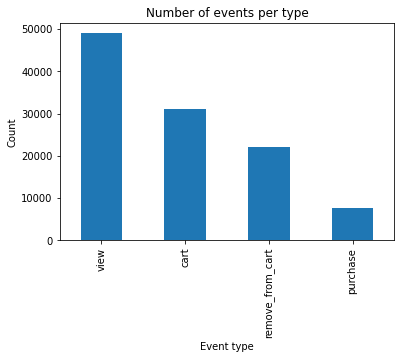

In [144]:
import matplotlib.pyplot as plt

# Get the number of events for each type
event_counts = df['event_type'].value_counts()

# Plot the bar chart
event_counts.plot(kind='bar')

# Set chart title and axis labels
plt.title('Number of events per type')
plt.xlabel('Event type')
plt.ylabel('Count')

# Show the chart
plt.show()


# Q6

In [147]:
import numpy as np

session_data = df.groupby(['user_id', 'user_session']).agg({
    'funnel_number': 'first',
    'index_in_funnel': 'first',
    'event_time': lambda x: (x.max() - x.min()).seconds,
    'event_type': lambda x: x.nunique(),
    'price': lambda x: x.sum(),
    'product_id': lambda x: x[x == 'view'].count(),
}).rename(columns={
    'event_time': 'duration',
    'event_type': 'num_events',
    'price': 'num_numeric_prices',
    'product_id': 'num_products_viewed'
}).reset_index()

session_data['list_of_viewed'] = df[df['event_type'] == 'view'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)

session_data['duration'] = pd.to_numeric(session_data['duration'], errors='coerce')
session_data['num_numeric_prices'] = pd.to_numeric(session_data['num_numeric_prices'], errors='coerce')

session_data = session_data.replace([np.inf, -np.inf], np.nan).fillna(0)


In [150]:
session_data

,user_id,user_session,funnel_number,index_in_funnel,duration,num_events,num_numeric_prices,num_products_viewed,list_of_viewed
0,13117447,1a345ef5-9a1e-47b3-b242-2cbb6b31d573,1,1,496,2,74.41,0,"[5866215, 5899429]"
1,25635927,c7439e5c-c7cd-477f-9194-2189e6c8d19d,1,1,223,2,0.00,0,"[5802162, 5766980]"
2,31156111,6db080df-701d-483c-9ae7-b92eba8dbca0,1,1,0,1,0.00,0,[5870366]
3,49353510,0bf8b54f-5b6e-4d16-b54a-b56973e6acbf,1,1,0,1,0.00,0,[5632482]
4,49353510,f5b88238-4413-4efa-9cb3-f40d5704760b,1,2,0,1,0.00,0,[5650530]
...,...,...,...,...,...,...,...,...,...
23539,574370132,92f90743-6907-4583-b4f8-4fc3e9f253f6,1,1,27,2,0.00,0,0
23540,574370158,41519e87-6cd6-4674-98bc-1834f896dcc7,1,1,0,1,0.00,0,0
23541,574370205,87d73c67-6988-4027-ac35-842dea5d3176,1,1,0,1,0.00,0,0
23542,574370259,06347f30-303c-4271-beba-3251bbf724bf,1,1,0,1,0.00,0,0
